<a href="https://colab.research.google.com/github/TonyMejia123/Act1/blob/main/Massachussets_de_Actividad_1_A01705757.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- Creamos el archivo con las indicaciones en colab

In [1]:
#Importamos las librerías necesarias en el inicio
from numpy import NaN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 2.- Leemos el archivo mediante pandas (pd) desde la página indicada. 

In [2]:
df = pd.read_csv("listings3.csv")

#3.-Pre-procesamiento necesario: Selección de variables, composición y simetría de valores sin Nan. 

In [3]:
#Usamos drop na con how= all para que si existen columnas o filas vacías se eliminen y no interfieran en el análisis 
df.dropna(axis = 1, how="all", inplace = True)

In [4]:
#Generamos un DFF que contenga las variables de valor que seleccionamos ya limpias de valores.
df2 = df[['room_type', 'number_of_reviews', 'host_acceptance_rate','price', 'availability_365', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_communication']]

In [5]:
#Hacemos un análisis rápido de la composición del archivo resultante
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    3089 non-null   object 
 1   number_of_reviews            3089 non-null   int64  
 2   host_acceptance_rate         2970 non-null   object 
 3   price                        3089 non-null   object 
 4   availability_365             3089 non-null   int64  
 5   review_scores_rating         2338 non-null   float64
 6   review_scores_cleanliness    2332 non-null   float64
 7   review_scores_communication  2332 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 193.2+ KB


In [6]:
#Transformamos las variables de object a float para poder manipularlas correctamente en el análisis a continuación. 
for i in df2.columns[1:]:
  if (df2[i].dtype == 'object'):
    for x,y in zip(df2[i], range(len(df2))):
      if (x!=NaN):
        z = str(x)
        z = z.replace('%','')
        z = z.replace(',','')
        z = z.replace('$','')
        df2[i][y] = z
    df2[i] = pd.to_numeric(df2[i], errors = 'coerce')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [7]:
#Ya que tenemos todos los datos transforados podemos rellenar los espacios faltantes (NaN) con el promedio de la columna para tener un análisis más limpio. 
for i in df2.columns[1:]:
  if (df2[i].dtype == 'int64'):
    df2[i].fillna(round(df2[i].mean()), inplace = True)
  if (df2[i].dtype == 'float64'):
    df2[i].fillna(round(df2[i].mean(),2), inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [8]:
#Podemos ver en la composición a continuación que nuestro DF2 ya contiene la misma cantidad de valores para todas las variables. 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    3089 non-null   object 
 1   number_of_reviews            3089 non-null   int64  
 2   host_acceptance_rate         3089 non-null   float64
 3   price                        3089 non-null   float64
 4   availability_365             3089 non-null   int64  
 5   review_scores_rating         3089 non-null   float64
 6   review_scores_cleanliness    3089 non-null   float64
 7   review_scores_communication  3089 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 193.2+ KB


#Tratamiento de Outliers 

In [9]:
#Definimos nuestras variables para los cuartiles a utilizar para la identifiación de los valores fuera del rango. 

p25 = df2.quantile(0.25) #|25|
p75 = df2.quantile(0.75) #|75| 
iqr = p75-p25 #Generamos el iqr mediante la resta (half)
ls = p75 + 1.5*iqr #Definimos límite superior
li = p25 - 1.5*iqr #Definimos límite inferior

df3 = df2.loc[:, df2.columns != 'room_type'][(df2<=ls)&(df2>=li)]
df3.fillna(round(df2.mean(),1), inplace = True)
df3 = pd.concat([df2['room_type'], df3], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   room_type                    3089 non-null   object 
 1   number_of_reviews            3089 non-null   float64
 2   host_acceptance_rate         3089 non-null   float64
 3   price                        3089 non-null   float64
 4   availability_365             3089 non-null   int64  
 5   review_scores_rating         3089 non-null   float64
 6   review_scores_cleanliness    3089 non-null   float64
 7   review_scores_communication  3089 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 193.2+ KB


#Separación por tipo de habitación


In [11]:
#dividir el dataframe por tipos de habitación
A = df3[df3["room_type"] == "Entire home/apt"]
B = df3[df3["room_type"] == "Private room"]
C = df3[df3["room_type"] == "Hotel room"]
D = df3[df3["room_type"] == "Shared room"]

#Graficamos con seaborn la correlación de todas las variables con el tipo de habitación.

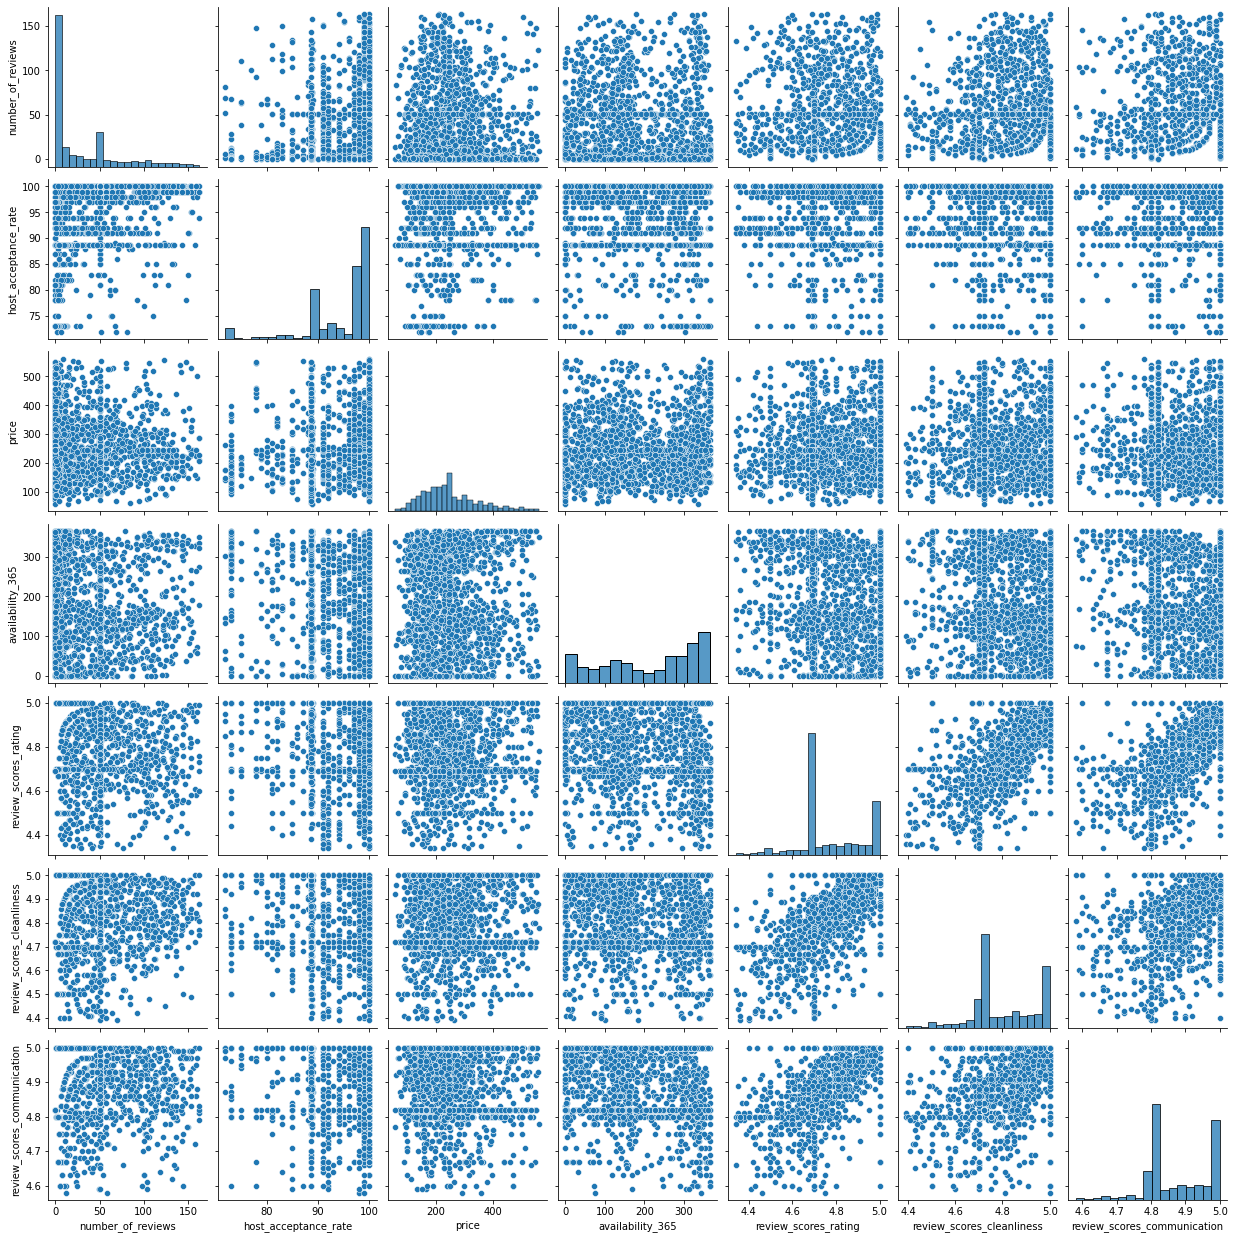

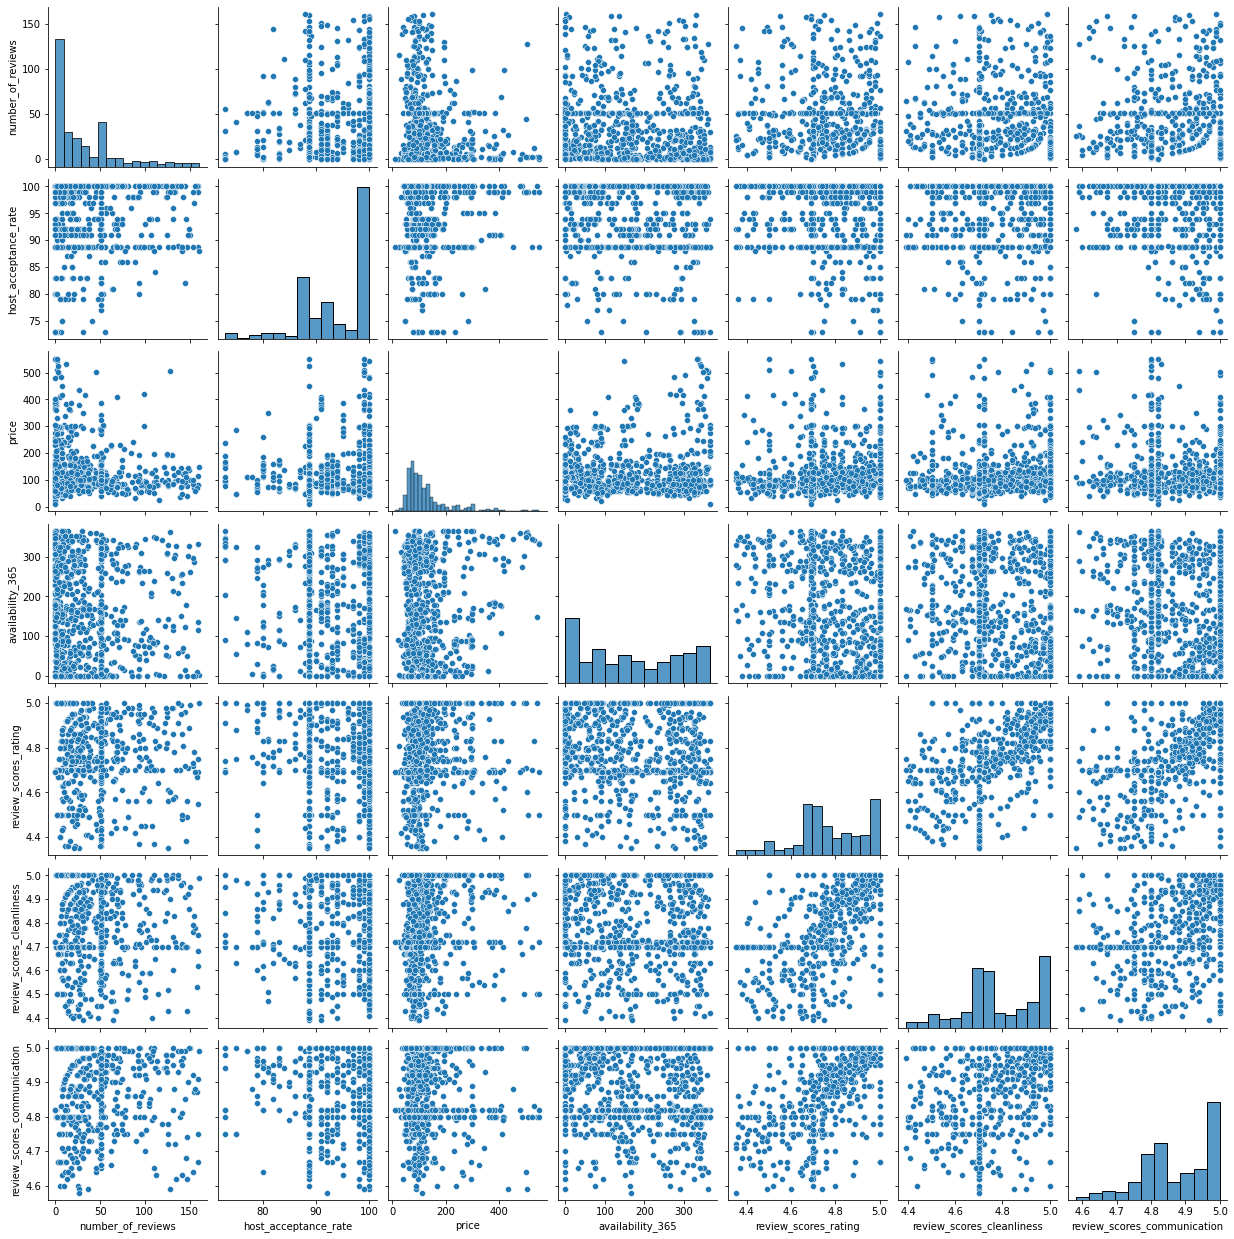

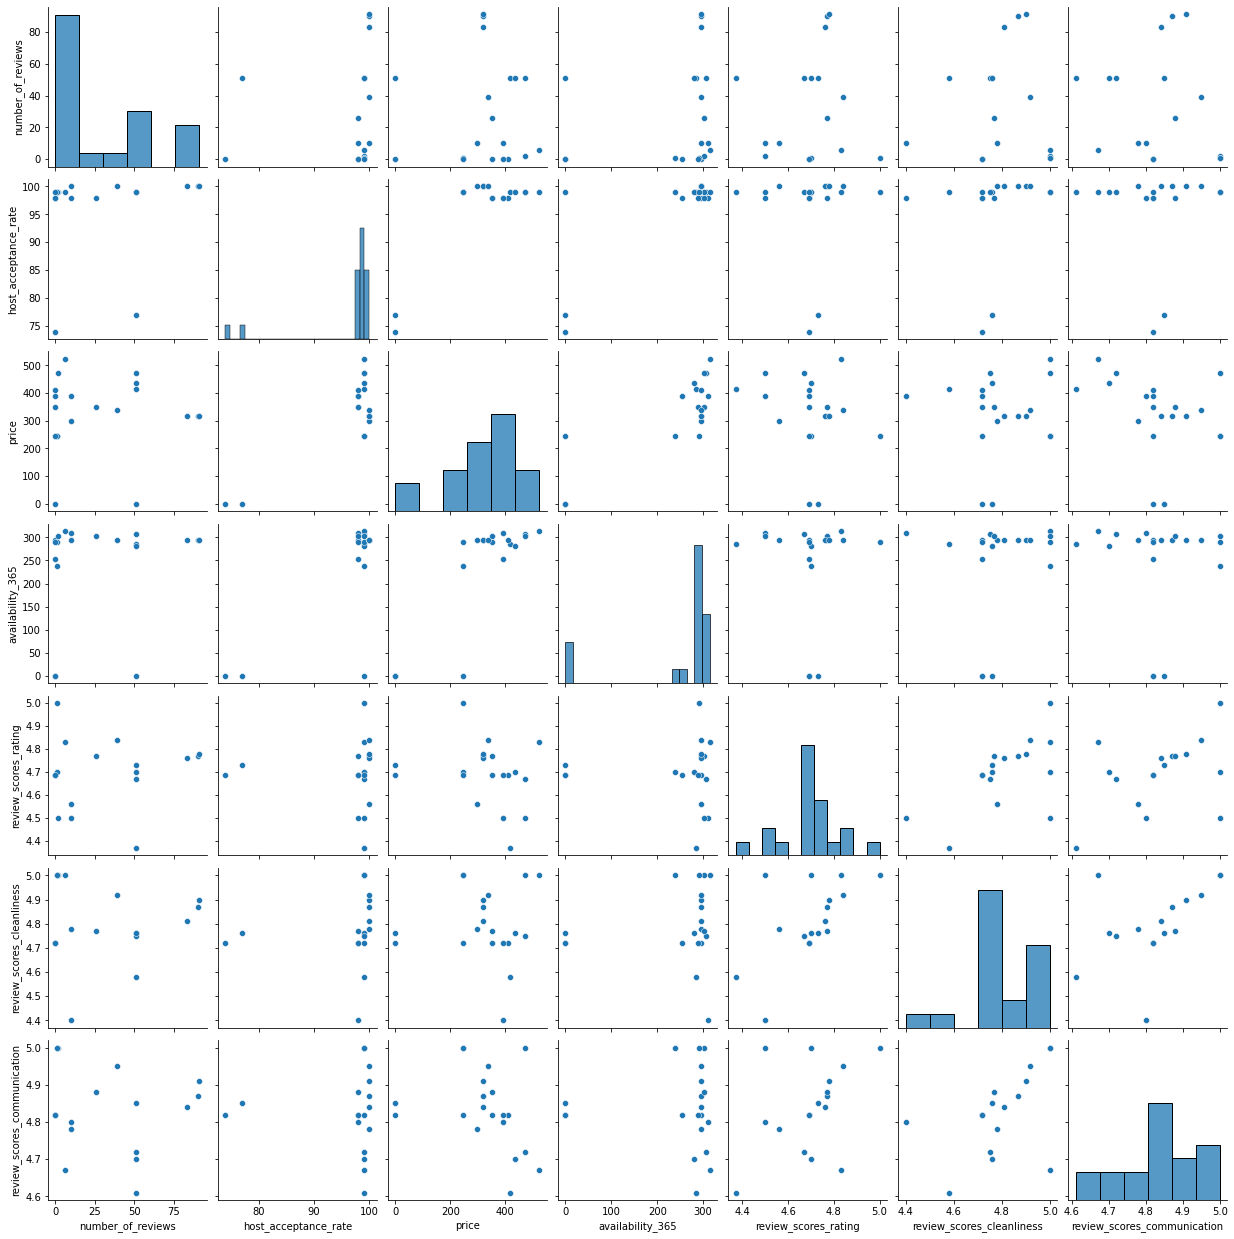

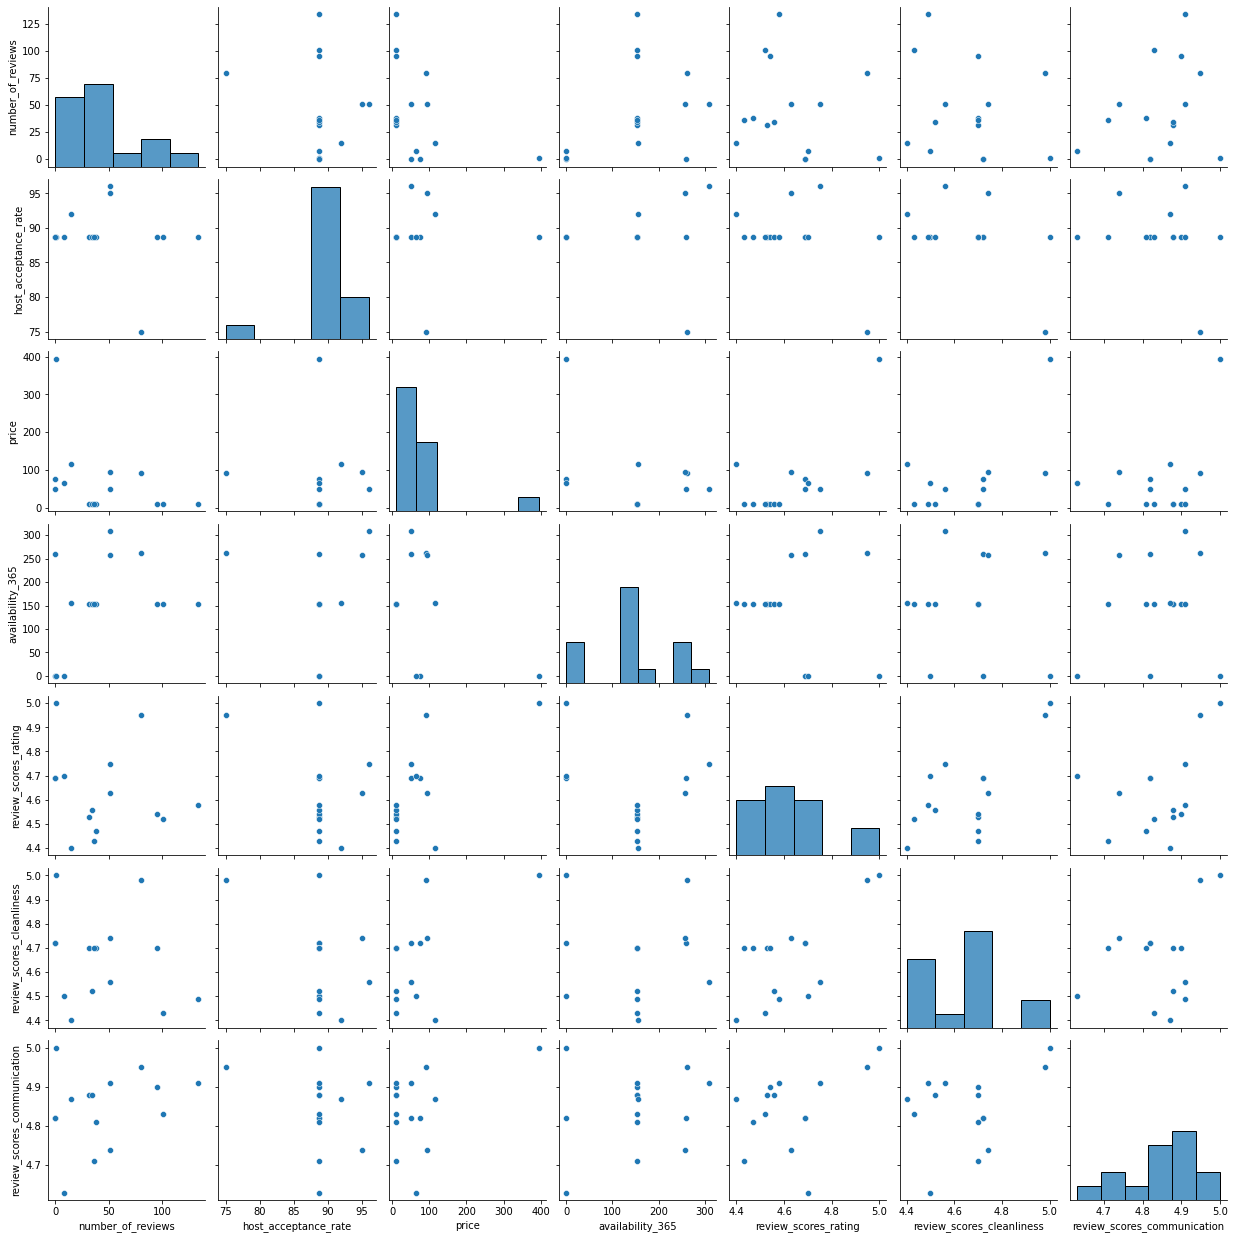

In [12]:
#Ploteamos el cruce de nuestros tipos de habitación con todas las variables del data set buscando alguna co-relación visual. 
sns.pairplot(A)
sns.pairplot(B)
sns.pairplot(C)
sns.pairplot(D)

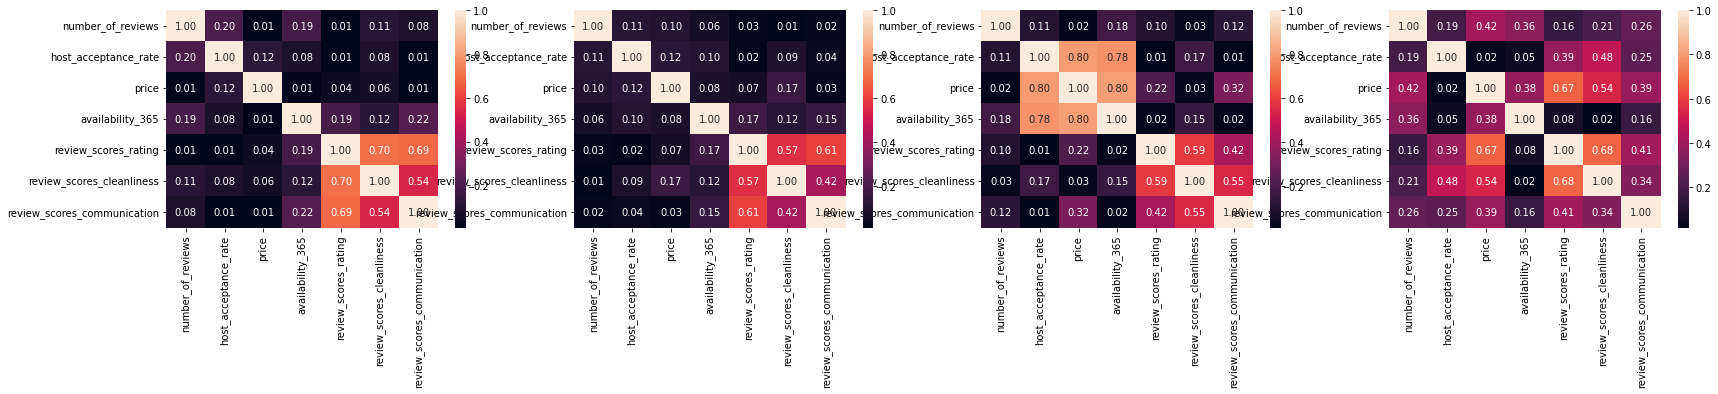

In [13]:
#Como no encontramos alguna co-relación evidente, 
#decidí llevar a cabo un heat map para encontrar las variables con mayor relación entre ellas.

f, ax = plt.subplots(1,4, figsize=(28, 4))
sns.heatmap(abs(A.corr()),annot=True, fmt=".2f", ax=ax[0])
sns.heatmap(abs(B.corr()), annot=True, fmt=".2f", ax=ax[1])
sns.heatmap(abs(C.corr()), annot=True, fmt=".2f", ax=ax[2])
sns.heatmap(abs(D.corr()),annot=True, fmt=".2f",  ax=ax[3])
plt.show()

In [18]:
l = [A,B]
n = [0,1]
o = ["Room Type"]
cc = ["Coeficiente de Correlación (R)"]
cd = ["Coeficiente de Determinación (R^2)"]
for data, x in zip(l, n):

  model= LinearRegression()
  model.fit(X=data[['host_acceptance_rate']], y=data['number_of_reviews'])
  print("Mejor fit:", df3['room_type'].unique()[x],' es: y = ', model.__dict__['coef_'][0],'*host_acceptance_rate ',model.__dict__['intercept_'])
  cd.append(model.score(data[['host_acceptance_rate']], data['number_of_reviews']))
  cc.append(np.sqrt(model.score(data[['host_acceptance_rate']], data['number_of_reviews'])))
  o.append(df3['room_type'].unique()[x])

model= LinearRegression()
model.fit(X=C[['availability_365']], y=C['number_of_reviews'])
print("Mejor fit:", df3['room_type'].unique()[2],' es: y = ', model.__dict__['coef_'][0],'*price + ',model.__dict__['intercept_'])
cd.append(model.score(C[['availability_365']], C['number_of_reviews']))
cc.append(np.sqrt(model.score(C[['availability_365']], C['number_of_reviews'])))
o.append(df3['room_type'].unique()[2])

model= LinearRegression()
model.fit(X=D[['price']], y=D['number_of_reviews'])
print("Mejor fit:", df3['room_type'].unique()[3],' es: y = ', model.__dict__['coef_'][0],'*price + ',model.__dict__['intercept_'])
cd.append(model.score(D[['price']], D['number_of_reviews']))
cc.append(np.sqrt(model.score(D[['price']], D['number_of_reviews'])))
o.append(df3['room_type'].unique()[3])


Mejor fit: Entire home/apt  es: y =  1.2226254421934037 *host_acceptance_rate  -85.5155149600292
Mejor fit: Private room  es: y =  0.6629294654893845 *host_acceptance_rate  -30.133414006224143
Mejor fit: Shared room  es: y =  0.05309063105048852 *price +  15.013959598976813
Mejor fit: Hotel room  es: y =  -0.17354447884948146 *price +  56.703952680095185


In [20]:
varc = ["Variable Ind. Highest CRR","host_acceptance_rate", "host_acceptance_rate", "availability_365", "price"]
Tabla = [o,varc,cc,cd]
pd.DataFrame(Tabla)

,0,1,2,3,4
0,Room Type,Entire home/apt,Private room,Shared room,Hotel room
1,Variable Ind. Highest CRR,host_acceptance_rate,host_acceptance_rate,availability_365,price
2,Coeficiente de Correlación (R),0.202864,0.114539,0.175519,0.415243
3,Coeficiente de Determinación (R^2),0.041154,0.013119,0.030807,0.172426
